# EDA on the Western Palearctic greater white-fronted geese dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Some information about the dataset

- **event ID**: An identifier for the set of information associated with each record or event in a data set. A unique event ID is assigned to every time-location or other time-measurement record in Movebank.
```
	example: 6340565
	units: none
```

- **visible**: Determines whether an event is visible on the Movebank Search map. Values are calculated automatically, with FALSE indicating that the event has been marked as an outlier by manually marked outlier or algorithm marked outlier. Allowed values are TRUE or FALSE.

- **timestamp**: The date and time a sensor measurement was taken.
```
	example: 2008-08-14 18:31:00.000
	format: yyyy-MM-dd HH:mm:ss.sss
	units: UTC (Coordinated Universal Time) or GPS time, which is a few leap seconds different from UTC
```

- **longitude (decimal degree)**: The geographic longitude of a location along an animal track as estimated by the processed sensor data. Positive values are east of the Greenwich Meridian, negative values are west of it.
```
	example: -121.1761111
	units: decimal degrees, WGS84 reference system
	same as: location long
```

- **latitude (decimal degree)**: The geographic longitude of a location along an animal track as estimated by the processed sensor data. Positive values are east of the Greenwich Meridian, negative values are west of it.
```
	example: -121.1761111
	units: decimal degrees, WGS84 reference system
	same as: location lat
```

- **ground speed**: The estimated ground speed provided by the sensor or calculated between consecutive locations.
```
	example: 7.22
	units: meters per second
```

- **heading**: The direction in which the tag is moving, in decimal degrees clockwise from north, as provided by the sensor or calculated between consecutive locations. Values range from 0–360: 0 = north, 90 = east, 180 = south, 270 = west.
```
	example: 315.88
	units: decimal degrees
```

- **height above mean sea level**: The estimated height of the tag above mean sea level returned by the GPS unit. (If altitudes are calculated as height above an ellipsoid, use height above ellipsoid.)
```
	example: 34
	units: meters
	same as: height above msl
```

- **sensor type**: The type of sensor with which data were collected. Values are chosen from a controlled list:
```
	acceleration: The sensor collects acceleration data.
	accessory measurements: The sensor collects accessory measurements, such as battery voltage.
	Argos Doppler shift: The sensor is using Argos Doppler shift for determining position.
	barometer: The sensor records air or water pressure.
	bird ring: The animal is identified by a ring that has a unique ID.
	GPS: The sensor uses GPS to find location and stores these.
	magnetometer: The sensor records the magnetic field.
	natural mark: The animal is identified by a natural marking.
	radio transmitter: The sensor is a classical radio transmitter.
	solar geolocator: The sensor collects light levels, which are used to determine position (for processed locations).
	solar geolocator raw: The sensor collects light levels, which are used to determine position (for raw light-level measurements).
```

- **taxon**: The scientific name of the species on which the tag was deployed, as defined by the Integrated Taxonomic Information System (ITIS, www.itis.gov). If the species name can not be provided, this should be the lowest level taxonomic rank that can be determined and that is used in the ITIS taxonomy. Additional information can be provided using the term taxon detail.
```
	example: Buteo swainsoni
	same as: species, animal taxon, individual taxon canonical name
```

- tag ID: A unique identifier for the tag, provided by the data owner. If the data owner does not provide a tag ID, an internal Movebank tag identifier may sometimes be shown.
	example: 2342, ptt_4532
	same as: tag local identifier

- **animal ID**: An individual identifier for the animal, provided by the data owner. This identifier can be a ring number, a name, the same as the associated tag ID, etc. If the data owner does not provide an Animal ID, an internal Movebank animal identifier may sometimes be shown.
```
	example: 91876A, Gary
	same as: individual-local-identifier
```

- **study**: The name of the study in Movebank in which data are stored.

In [34]:
df = pd.read_csv('drive/MyDrive/CS313/data/Western-Palearctic-greater-white-fronted-geese.csv')

## Data Understanding

In [35]:
df.shape

(1086662, 13)

In [36]:
df.head(10)

,event-id,visible,timestamp,location-long,location-lat,ground-speed,heading,height-above-msl,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,8667493081,True,2014-03-01 00:00:06.000,8.831596,53.676450,0.01,0.00,39.2,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
1,8667493082,True,2014-03-01 00:30:07.000,8.831814,53.676337,0.05,0.00,38.4,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
2,8667493083,True,2014-03-01 01:00:06.000,8.831735,53.676069,0.02,0.00,38.8,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
3,8667493084,True,2014-03-01 01:30:07.000,8.831851,53.675843,0.06,0.00,35.3,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
4,8667493085,True,2014-03-01 02:00:06.000,8.832654,53.675390,0.04,0.00,42.1,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
5,8667493086,True,2014-03-01 02:30:06.000,8.832265,53.676039,0.06,0.00,42.7,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
6,8667493087,True,2014-03-01 03:00:06.000,8.832113,53.675646,0.01,0.00,42.8,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
7,8667493088,True,2014-03-01 03:30:07.000,8.832097,53.675886,0.02,0.00,44.5,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
8,8667493089,True,2014-03-01 04:00:07.000,8.832370,53.675905,0.04,0.00,40.6,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
9,8667493090,True,2014-03-01 04:30:06.000,8.832756,53.676158,0.06,222.82,42.2,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086662 entries, 0 to 1086661
Data columns (total 13 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   event-id                         1086662 non-null  int64  
 1   visible                          1086662 non-null  bool   
 2   timestamp                        1086662 non-null  object 
 3   location-long                    1086662 non-null  float64
 4   location-lat                     1086662 non-null  float64
 5   ground-speed                     1081972 non-null  float64
 6   heading                          1068795 non-null  float64
 7   height-above-msl                 1027577 non-null  float64
 8   sensor-type                      1086662 non-null  object 
 9   individual-taxon-canonical-name  1086662 non-null  object 
 10  tag-local-identifier             1086662 non-null  int64  
 11  individual-local-identifier      1086662 non-null 

In [5]:
df.describe()

,event-id,location-long,location-lat,ground-speed,heading,height-above-msl,tag-local-identifier
count,1.086662e+06,1.086662e+06,1.086662e+06,1.081972e+06,1.068795e+06,1.027577e+06,1.086662e+06
mean,8.671838e+09,4.377418e+01,6.322754e+01,1.661057e+00,1.240142e+02,6.215868e+01,2.446504e+03
std,3.862558e+07,2.743829e+01,8.060734e+00,4.945927e+00,1.239777e+02,1.160507e+02,1.228158e+03
min,8.667493e+09,-4.948864e-01,4.680207e+01,0.000000e+00,0.000000e+00,-9.912000e+02,3.280000e+02
25%,8.667765e+09,2.486086e+01,5.488319e+01,6.000000e-02,0.000000e+00,4.600000e+00,1.041000e+03
50%,8.668037e+09,4.726336e+01,6.576683e+01,1.500000e-01,9.150000e+01,3.980000e+01,3.410000e+03
75%,8.668308e+09,5.601227e+01,6.941056e+01,3.700000e-01,2.295000e+02,9.240000e+01,3.431000e+03
max,9.063774e+09,1.132370e+02,7.616718e+01,9.992000e+01,3.600000e+02,1.166920e+04,4.008000e+03


In [38]:
for col in df.columns:
  # print(col)
  # print(df[col].unique())
  if df[col].dtype != 'object':
    continue

  print(df[col].value_counts())

  print('\n')



In [39]:
df.loc[df.duplicated()]

,event-id,visible,timestamp,location-long,location-lat,ground-speed,heading,height-above-msl,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name


In [40]:
df.isna().sum()

,0
event-id,0
visible,0
timestamp,0
location-long,0
location-lat,0
ground-speed,4690
heading,17867
height-above-msl,59085
sensor-type,0
individual-taxon-canonical-name,0


I use **linear interpolation** because this is animal movement data:

- Movement data (like speed and heading) usually changes gradually.

- Interpolation maintains the trend and makes logical sense in most animal movement scenarios.

In [41]:
df['ground-speed'].interpolate(method='linear', inplace=True)
df['heading'].interpolate(method='linear', inplace=True)
df['height-above-msl'].interpolate(method='linear', inplace=True)

## Data Visualization


Analysis of 'visible' column:
visible
True    1086662
Name: count, dtype: int64


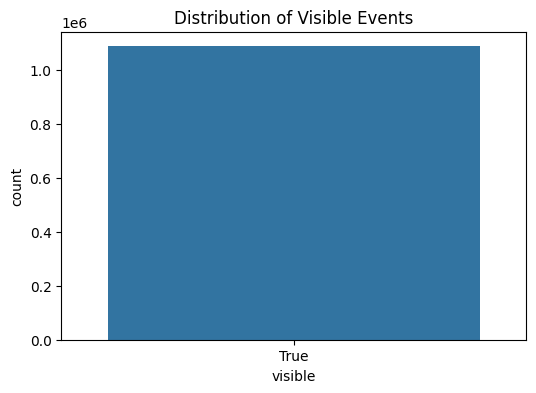


Analysis of 'timestamp' column:
Data range: 2014-03-01 00:00:06 to 2017-11-15 23:30:32


In [44]:
# Analyze 'visible' column
print("\nAnalysis of 'visible' column:")
print(df['visible'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='visible')
plt.title('Distribution of Visible Events')
plt.show()

# Analyze 'timestamp' column
print("\nAnalysis of 'timestamp' column:")
# Convert timestamp to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(f"Data range: {df['timestamp'].min()} to {df['timestamp'].max()}")

# Extract temporal features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

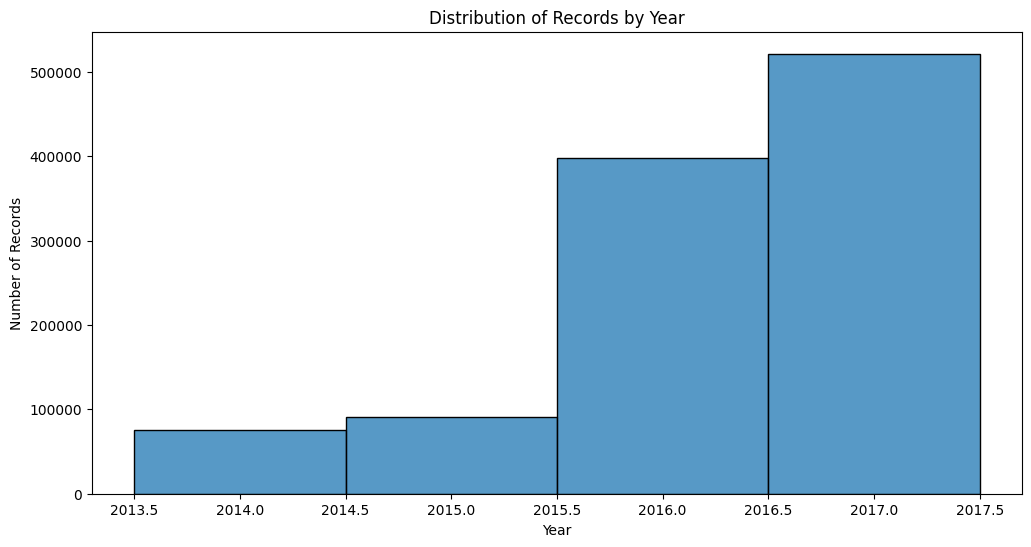

In [45]:
# Visualize temporal distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['year'], bins=df['year'].nunique(), discrete=True)
plt.title('Distribution of Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.show()

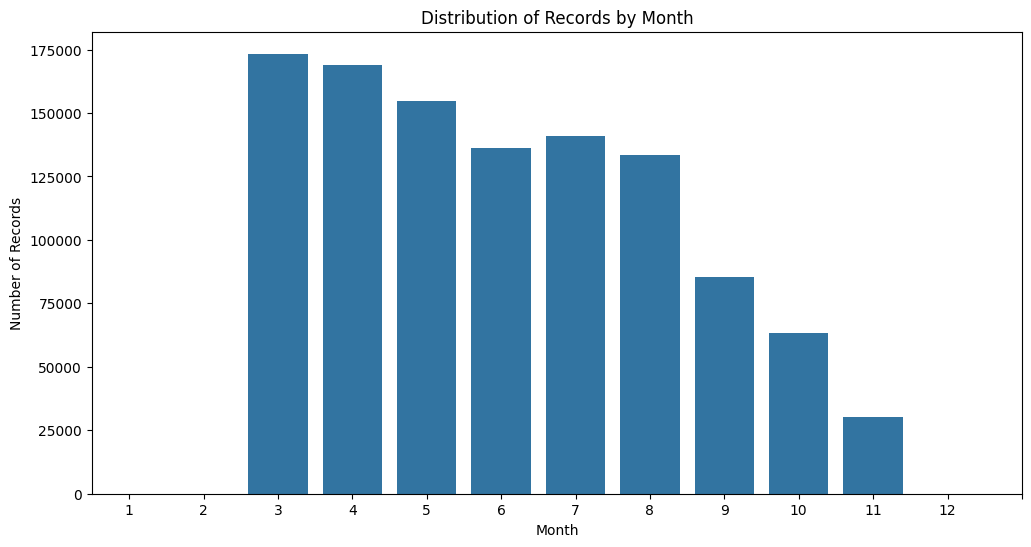

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month', order=range(1, 13))
plt.title('Distribution of Records by Month')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.xticks(range(0, 13))
plt.show()

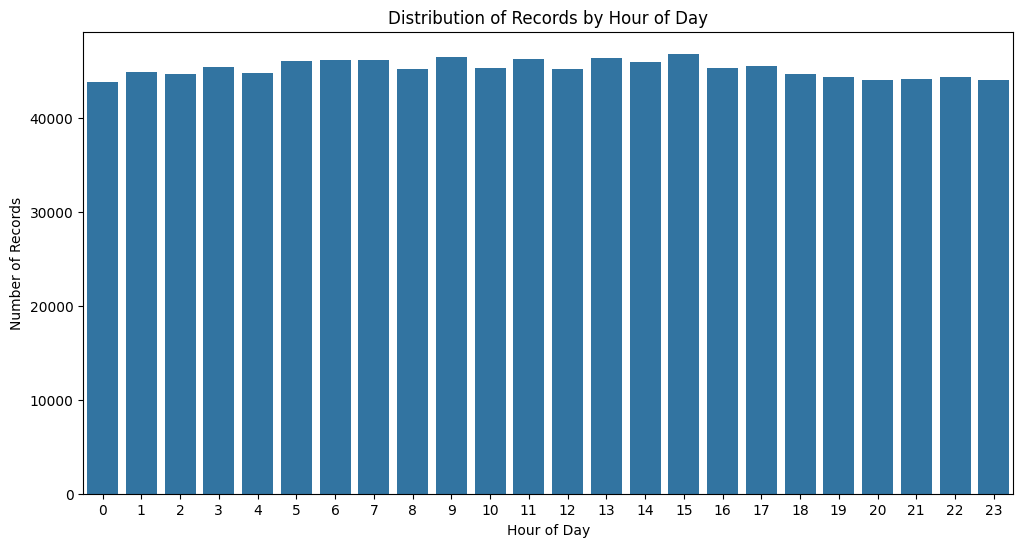

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour')
plt.title('Distribution of Records by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Records')
plt.xticks(range(24))
plt.show()


Analysis of 'location-long' and 'location-lat' columns:


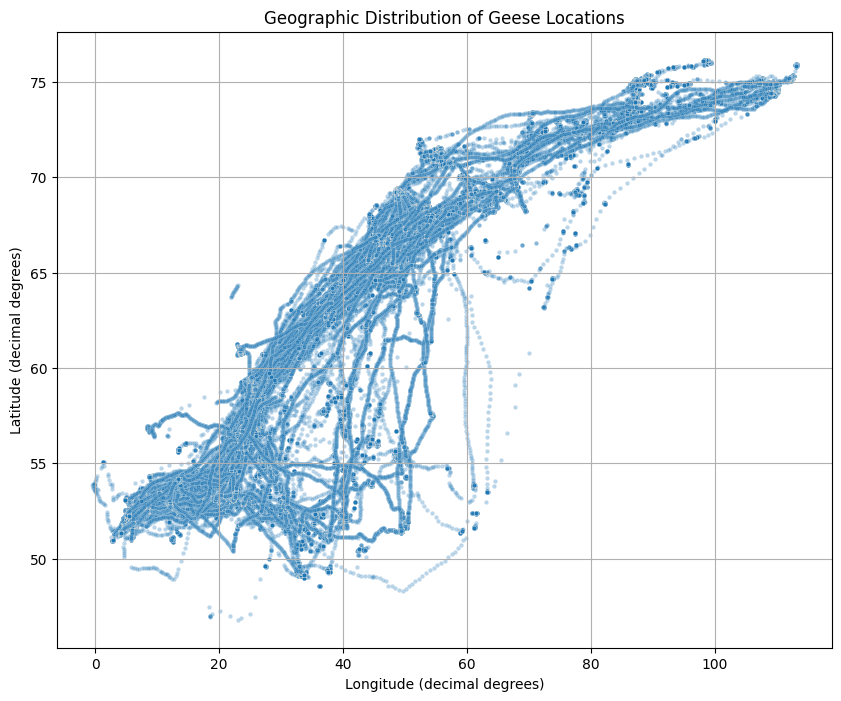

In [15]:
# Analyze 'location-long' and 'location-lat' columns
print("\nAnalysis of 'location-long' and 'location-lat' columns:")
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='location-long', y='location-lat', alpha=0.3, s=10)
plt.title('Geographic Distribution of Geese Locations')
plt.xlabel('Longitude (decimal degrees)')
plt.ylabel('Latitude (decimal degrees)')
plt.grid(True)
plt.show()

In [61]:
df['ground-speed'].value_counts().head(10)

,count
ground-speed,
0.03,53708
0.04,52309
0.05,48669
0.02,47506
0.06,44133
0.07,40259
0.08,37012
0.09,33789
0.10,31161


In [62]:
df['ground-speed'].describe()

,ground-speed
count,1.086662e+06
mean,1.656738e+00
std,4.937484e+00
min,0.000000e+00
25%,6.000000e-02
50%,1.500000e-01
75%,3.700000e-01
max,9.992000e+01



Analysis of 'ground-speed' column:
Missing ground-speed values: 0


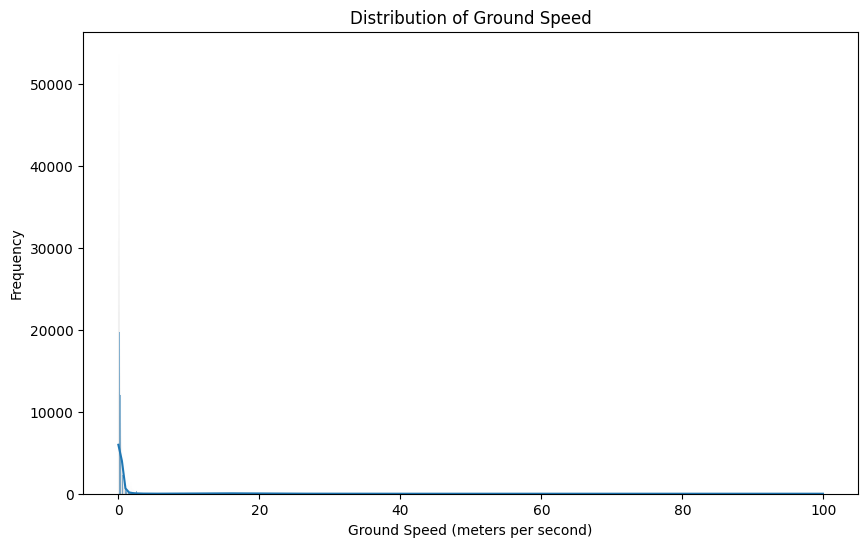

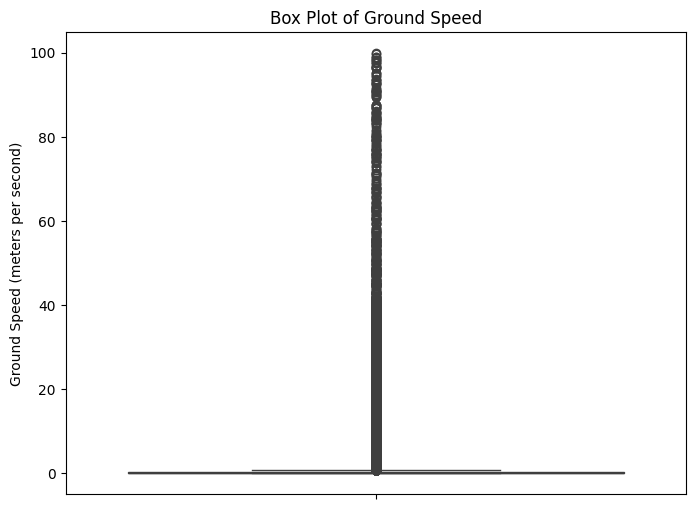

In [16]:
# Analyze 'ground-speed' column
print("\nAnalysis of 'ground-speed' column:")
plt.figure(figsize=(10, 6))
sns.histplot(df['ground-speed'], kde=True)
plt.title('Distribution of Ground Speed')
plt.xlabel('Ground Speed (meters per second)')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ground-speed'])
plt.title('Box Plot of Ground Speed')
plt.ylabel('Ground Speed (meters per second)')
plt.show()

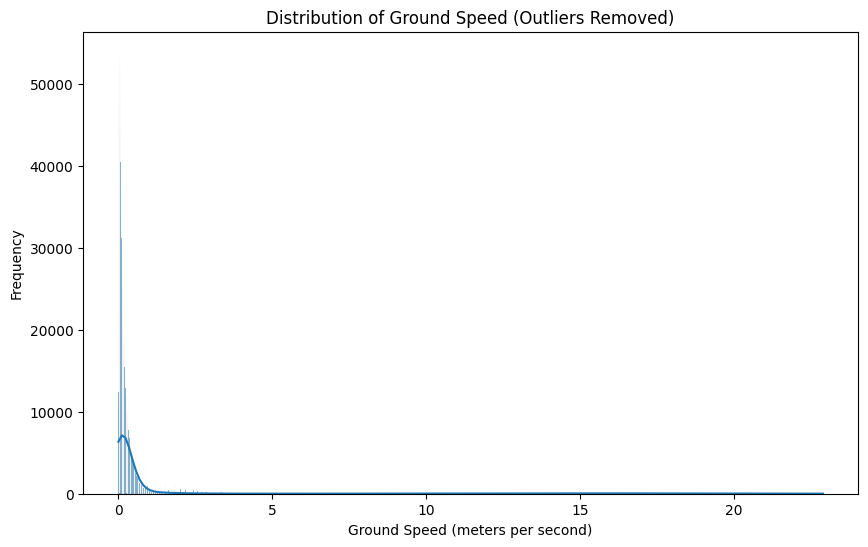

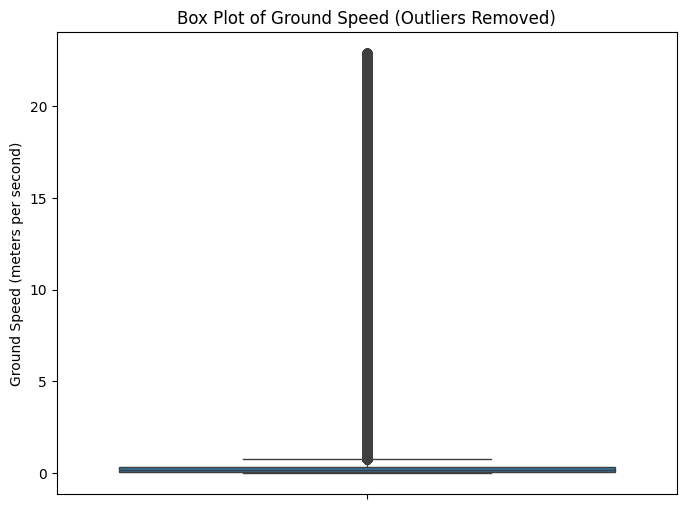

In [65]:
threshold = df['ground-speed'].quantile(0.99)

df_filtered_speed = df[df['ground-speed'] <= threshold].copy()

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_speed['ground-speed'], kde=True)
plt.title('Distribution of Ground Speed (Outliers Removed)')
plt.xlabel('Ground Speed (meters per second)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtered_speed['ground-speed'])
plt.title('Box Plot of Ground Speed (Outliers Removed)')
plt.ylabel('Ground Speed (meters per second)')
plt.show()


Analysis of 'heading' column:


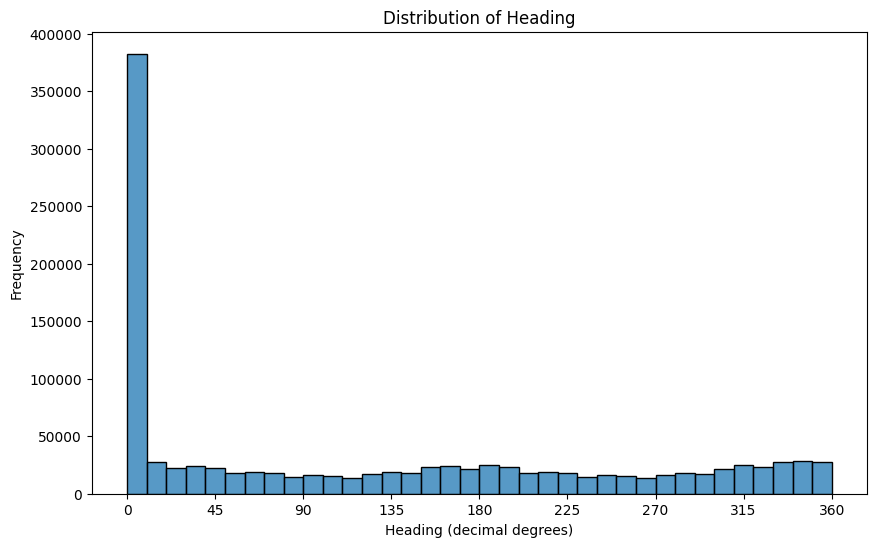

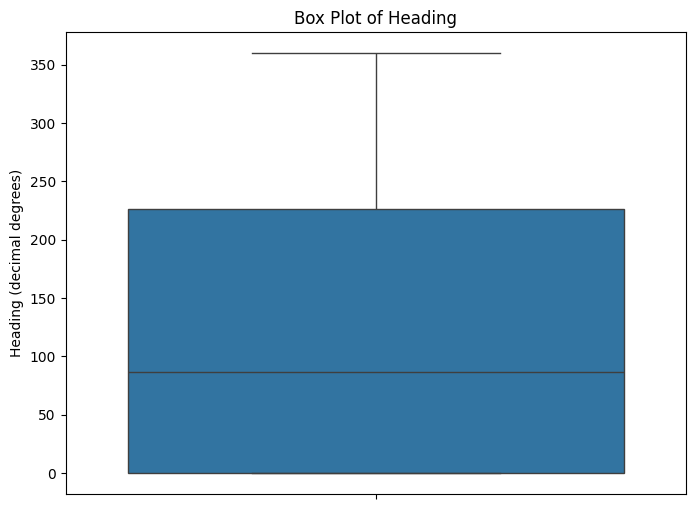

In [17]:
# Analyze 'heading' column
print("\nAnalysis of 'heading' column:")
plt.figure(figsize=(10, 6))
sns.histplot(df['heading'], bins=36) # Using 36 bins for 10-degree intervals
plt.title('Distribution of Heading')
plt.xlabel('Heading (decimal degrees)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 361, 45)) # Show North, East, South, West
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['heading'])
plt.title('Box Plot of Heading')
plt.ylabel('Heading (decimal degrees)')
plt.show()

## Some Observations:

1. **Severe Right Skew**
- Most values are clustered between $6$ m and $90$ m.

- A few extremely large values (up to $11,669$ m) are massively stretching the scale.

2. **Negative Altitudes**
- min = $-991.2$ meters is suspicious.

- Possibly a sensor error, bad calibration, or placeholder for missing data.

- Below sea level readings are possible but rare for geese.

3. **Outliers Clearly Present**
- The **mean** $>$ **median** suggests strong skew.

In [71]:
df['height-above-msl'].describe()

,height-above-msl
count,1.086662e+06
mean,6.109742e+01
std,1.131854e+02
min,-9.912000e+02
25%,6.000000e+00
50%,3.900000e+01
75%,9.020000e+01
max,1.166920e+04


*Outliers dominate the plot and hide the actual distribution of most data.*


Analysis of 'height-above-msl' column:


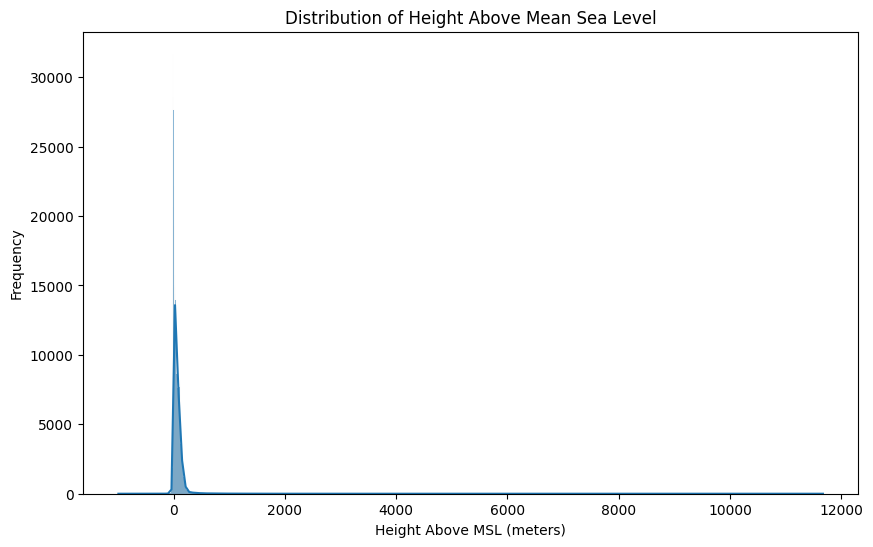

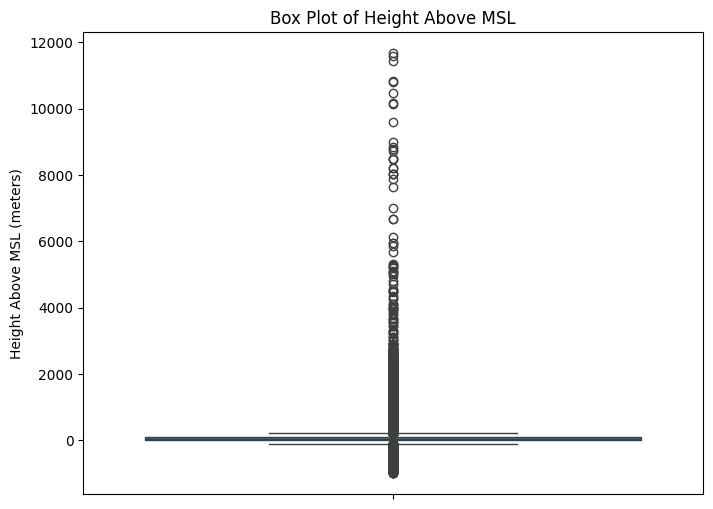

In [66]:
# Analyze 'height-above-msl' column
print("\nAnalysis of 'height-above-msl' column:")
plt.figure(figsize=(10, 6))
sns.histplot(df['height-above-msl'], kde=True)
plt.title('Distribution of Height Above Mean Sea Level')
plt.xlabel('Height Above MSL (meters)')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['height-above-msl'])
plt.title('Box Plot of Height Above MSL')
plt.ylabel('Height Above MSL (meters)')
plt.show()

In [73]:
# Analyze 'sensor-type' column
print("\nAnalysis of 'sensor-type' column:")
print(df['sensor-type'].value_counts())
# plt.figure(figsize=(6, 4))
# sns.countplot(data=df, x='sensor-type')
# plt.title('Distribution of Sensor Types')
# plt.show()


Analysis of 'sensor-type' column:
sensor-type
gps    1086662
Name: count, dtype: int64


In [72]:
# Analyze 'individual-taxon-canonical-name' column
print("\nAnalysis of 'individual-taxon-canonical-name' column:")
print(df['individual-taxon-canonical-name'].value_counts())
# plt.figure(figsize=(8, 6))
# sns.countplot(data=df, y='individual-taxon-canonical-name')
# plt.title('Distribution of Taxon')
# plt.show()


Analysis of 'individual-taxon-canonical-name' column:
individual-taxon-canonical-name
Anser albifrons    1086662
Name: count, dtype: int64



Analysis of 'tag-local-identifier' column:
Number of unique tag IDs: 81

Top 10 most frequent tag IDs:
tag-local-identifier
1071    27723
1035    26539
1036    25868
1037    24819
1082    24512
3447    24015
3442    23925
3449    23857
1042    23827
1058    23756
Name: count, dtype: int64


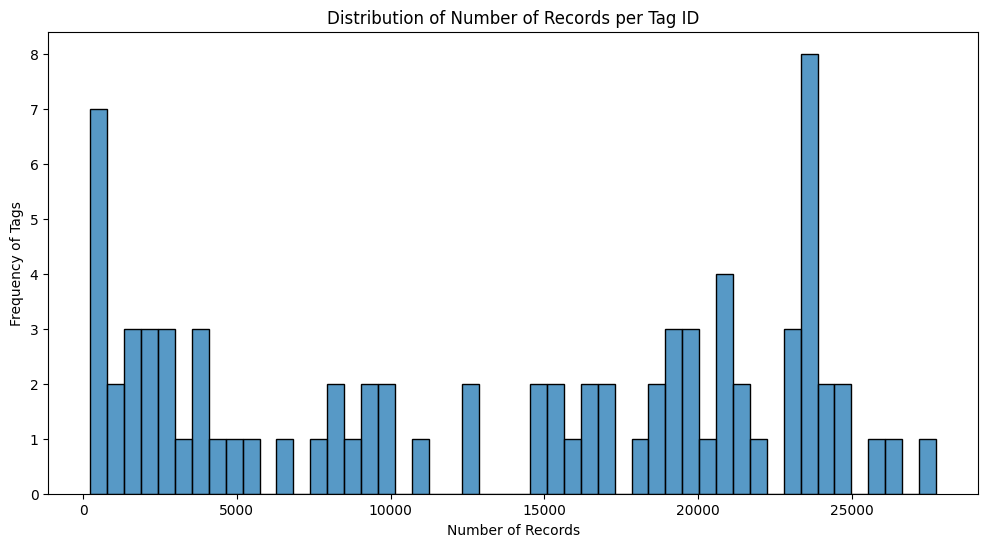

In [21]:
# Analyze 'tag-local-identifier' column
print("\nAnalysis of 'tag-local-identifier' column:")
print(f"Number of unique tag IDs: {df['tag-local-identifier'].nunique()}")
# Due to the potentially large number of unique IDs, a simple count plot might not be informative.
# We can look at the distribution of the number of records per tag.
tag_counts = df['tag-local-identifier'].value_counts()
print("\nTop 10 most frequent tag IDs:")
print(tag_counts.head(10))
plt.figure(figsize=(12, 6))
sns.histplot(tag_counts, bins=50)
plt.title('Distribution of Number of Records per Tag ID')
plt.xlabel('Number of Records')
plt.ylabel('Frequency of Tags')
plt.show()


Analysis of 'individual-local-identifier' column:
Number of unique animal IDs: 81

Top 10 most frequent animal IDs:
individual-local-identifier
71_Jan_M         27723
KOL_35_F         26539
KOL_36_F         25868
KOL_37_F         24819
82_Chris_M       24512
GWFG_2015_447    24015
GWFG_2015_442    23925
GWFG_2015_449    23857
KOL_42_F         23827
58_WouterII_M    23756
Name: count, dtype: int64


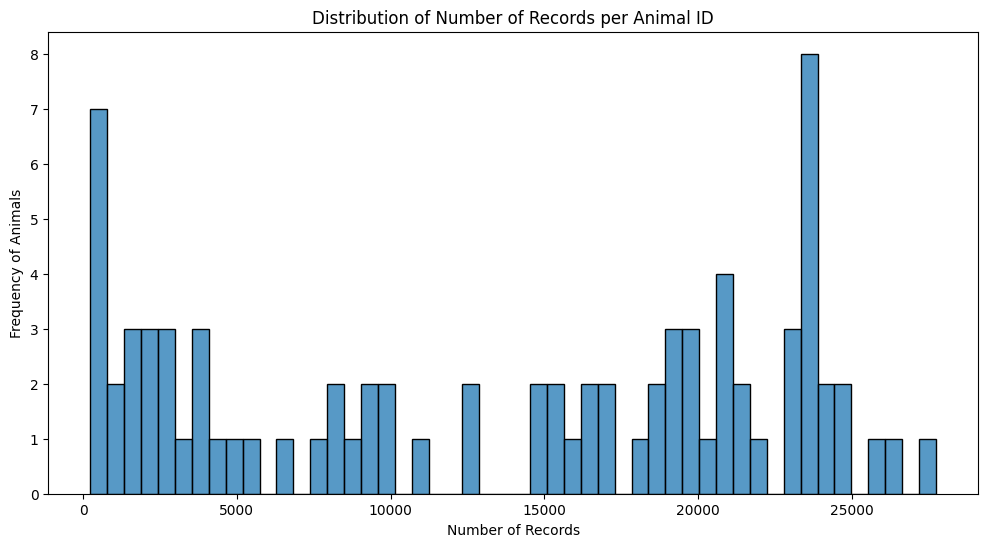

In [22]:
# Analyze 'individual-local-identifier' column
print("\nAnalysis of 'individual-local-identifier' column:")
print(f"Number of unique animal IDs: {df['individual-local-identifier'].nunique()}")
animal_counts = df['individual-local-identifier'].value_counts()
print("\nTop 10 most frequent animal IDs:")
print(animal_counts.head(10))
plt.figure(figsize=(12, 6))
sns.histplot(animal_counts, bins=50)
plt.title('Distribution of Number of Records per Animal ID')
plt.xlabel('Number of Records')
plt.ylabel('Frequency of Animals')
plt.show()

In [74]:
# Analyze 'study-name' column
print("\nAnalysis of 'study-name' column:")
print(df['study-name'].value_counts())
# plt.figure(figsize=(8, 6))
# sns.countplot(data=df, y='study-name')
# plt.title('Distribution of Study Names')
# plt.show()



Analysis of 'study-name' column:
study-name
North Sea population tracks of greater white-fronted geese 2014-2017 (data from Kölzsch et al. 2019)    1086662
Name: count, dtype: int64


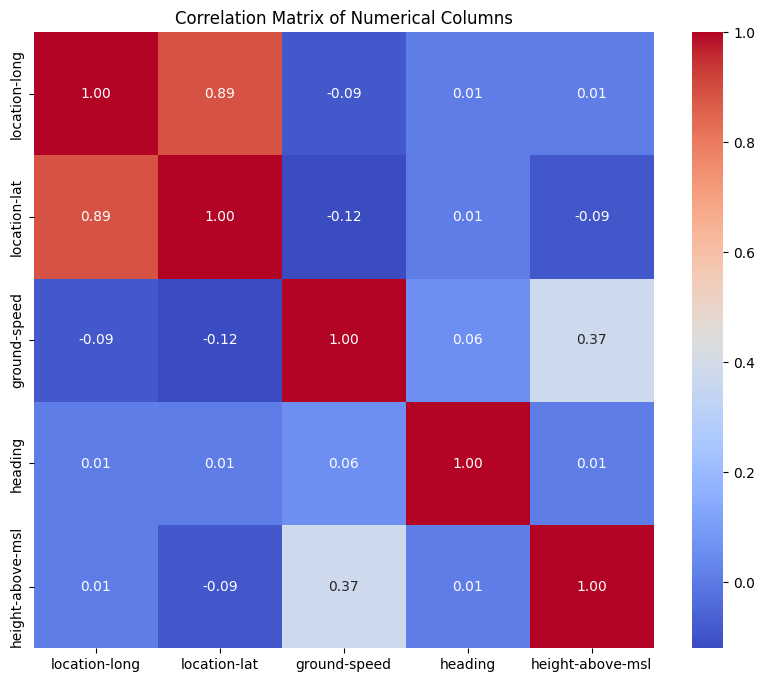

In [26]:
# Relationship between numerical columns
numerical_cols = ['location-long', 'location-lat', 'ground-speed', 'heading', 'height-above-msl']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

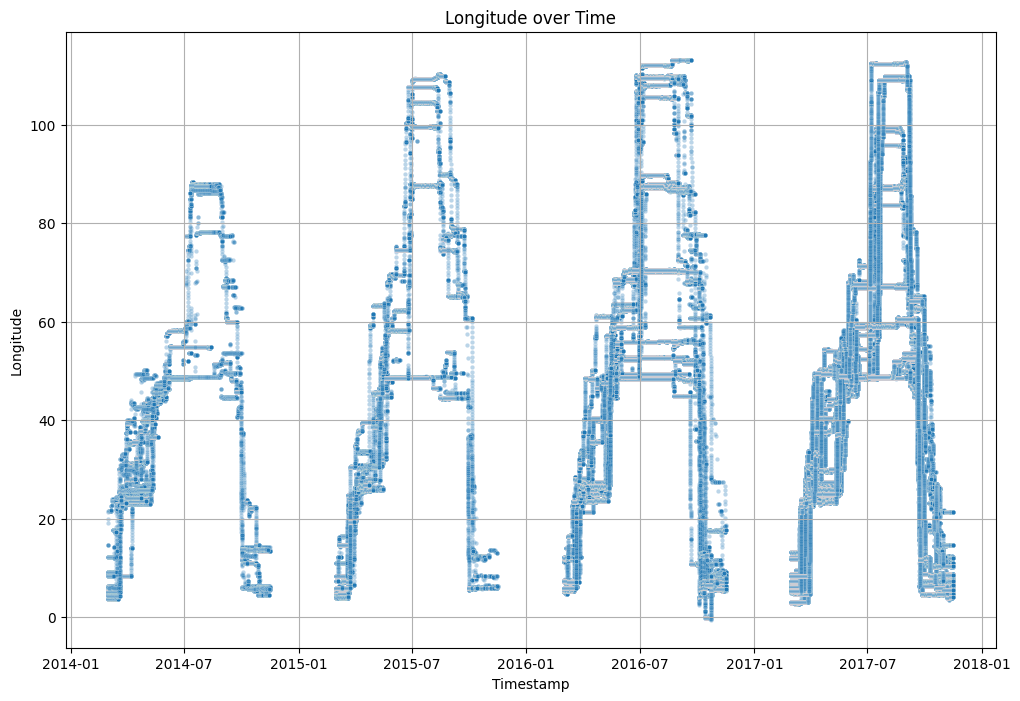

In [28]:
# Relationship between location and time (basic visualization)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='timestamp', y='location-long', alpha=0.3, s=10)
plt.title('Longitude over Time')
plt.xlabel('Timestamp')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

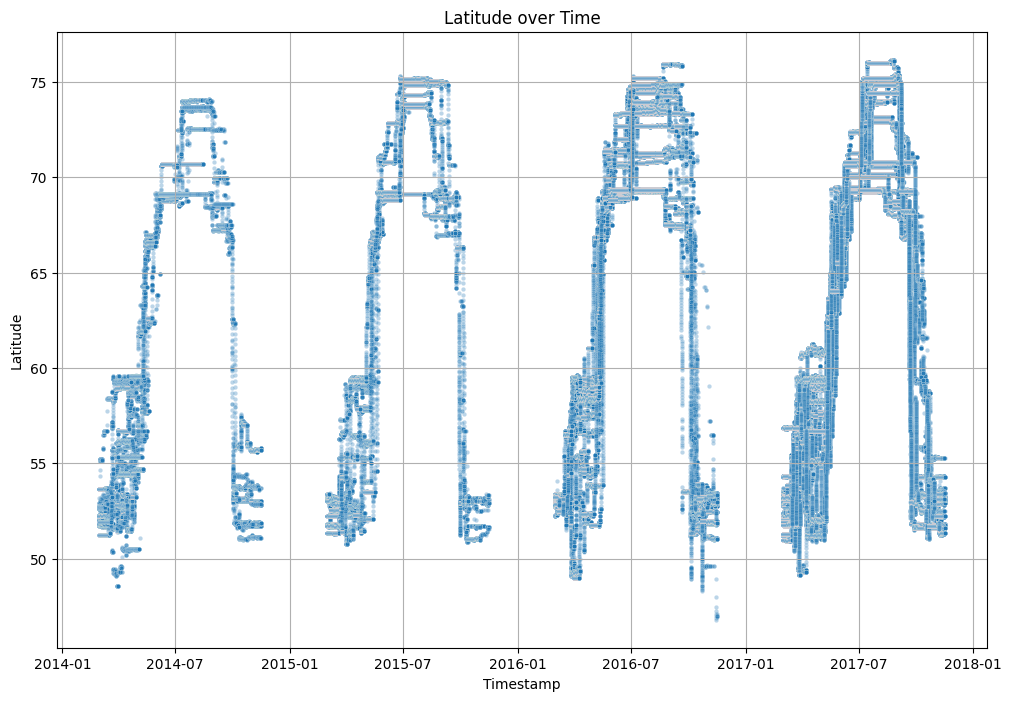

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='timestamp', y='location-lat', alpha=0.3, s=10)
plt.title('Latitude over Time')
plt.xlabel('Timestamp')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()